In [1]:
# Add the parent directory to the path
import sys, os
sys.path.insert(0, os.path.abspath(".."))

# Import numpy and ShortestPathGrid class
import numpy as np
from src.models.ShortestPathGrid import ShortestPathGrid

In [2]:
# Generate data
m, n = (5, 5)  # grid size
# Create a random cost array for the grid
cost = np.arange((m-1)*n + m*(n-1))
np.random.shuffle(cost)
# Initialize the ShortestPathGrid with the cost array
grid = ShortestPathGrid(m, n, cost=cost)

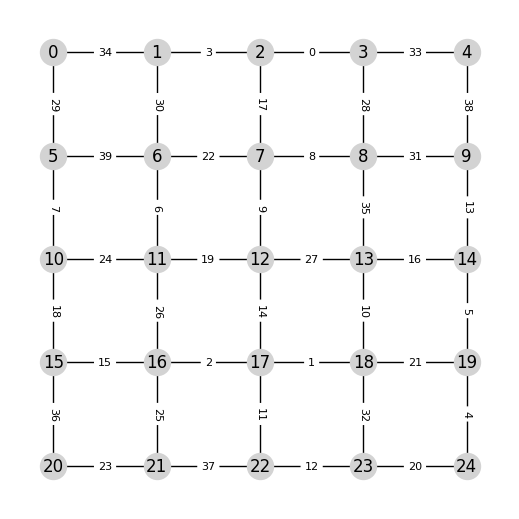

In [3]:
# Visualize the grid and edge costs
grid.visualize()

In [4]:
# Set source and target of optimization
source = 1 # source node
target = 23 # target node

# Solve the shortest path problem
sol, obj = grid.solve(source=source, target=target)

Optimal objective: 66


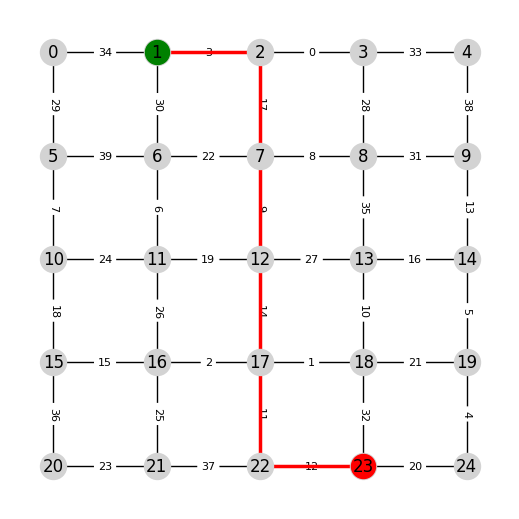

In [5]:
# Visualize the shortest path
grid.visualize(source=source, target=target, color_edges=sol)
print("Optimal objective:", obj)

In [6]:
import pyepo

# Set parameters for data generation
num_train_data = 1000 # number of training data
num_test_data = 1000 # number of test data
num_feat = 5 # size of feature
deg = 4 # polynomial degree
e = 0.5 # noise width

# Generate data for shortest path problem
feats, costs = pyepo.data.shortestpath.genData(num_train_data+num_test_data, num_feat, (m,n), deg=deg, noise_width=e, seed=135)

In [7]:
# split train test data
from sklearn.model_selection import train_test_split
x_train, x_test, c_train, c_test = train_test_split(feats, costs, test_size=num_test_data, random_state=42)

In [8]:
from src.models.LinearRegression import LinearRegression

# Instantiate linear regression model
model = LinearRegression(num_feat=num_feat, num_edges=grid.num_edges())

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Choose loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [10]:
# Data loading
train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(c_train).float())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test).float(), torch.from_numpy(c_test).float())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True)

In [11]:
from src.models.trainer import Trainer

# # 2) Build your two‐stage network:
# #    e.g. lr = LinearRegression(...); opt = ShortestPath(...)
# #    maybe wrap them in a single nn.Module
# model = MyOptNetPipeline(linear_model=model, opt_model=opt)

# Train linear regression model
trainer = Trainer(model, optimizer, criterion)
train_loss, test_loss = trainer.fit(train_loader, test_loader)


Epoch 000 | Train Loss: 1.3948 | Val Loss: 1.4157
Epoch 010 | Train Loss: 0.7284 | Val Loss: 0.7614
Epoch 020 | Train Loss: 0.4284 | Val Loss: 0.4629
Epoch 030 | Train Loss: 0.2923 | Val Loss: 0.3252
Epoch 040 | Train Loss: 0.2305 | Val Loss: 0.2615
Epoch 050 | Train Loss: 0.2023 | Val Loss: 0.2317
Epoch 060 | Train Loss: 0.1894 | Val Loss: 0.2175
Epoch 070 | Train Loss: 0.1834 | Val Loss: 0.2107
Epoch 080 | Train Loss: 0.1807 | Val Loss: 0.2074
Epoch 090 | Train Loss: 0.1794 | Val Loss: 0.2057
Epoch 100 | Train Loss: 0.1788 | Val Loss: 0.2048


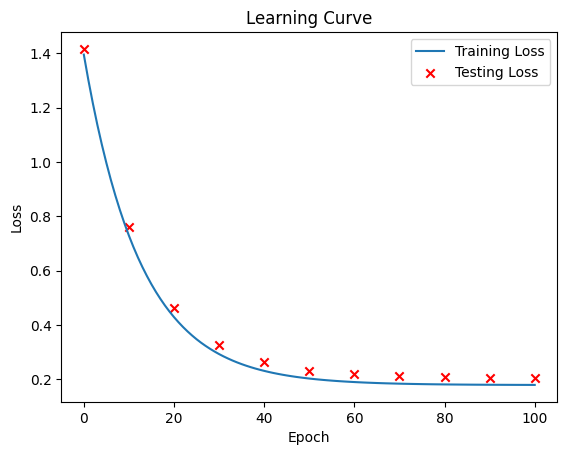

In [12]:
import matplotlib.pyplot as plt

# Plot learning curve and optionally test loss
plt.plot(train_loss, label='Training Loss')
if test_loss:
    plt.scatter(np.arange(len(test_loss))*trainer.n_epochs, test_loss, marker='x', color='red', label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [13]:
# init black box solver
spop = pyepo.func.SPOPlus(grid)

Num of cores: 1


In [ ]:
# Test for a single data batch
x = object(); c = object(); cp = object(); w = object(); z = object()
for x_batch, c_batch in train_loader:
    x, c = x_batch, c_batch
    cp = model(x)
    w, z = grid.solve(source=source, target=target, cost=c)
    break

In [15]:
spop(cp, c, w, z)

Hello from SPO+
tensor([ 0.8791, -0.4978,  0.5308,  0.1440,  0.1958,  0.0510,  0.5755, -0.6195,
         1.1068, -0.7419, -0.0109,  0.8902,  0.3164, -0.6026, -0.0485, -0.5994,
         0.6441, -0.1225,  0.0389, -0.0850,  0.7015, -0.1200, -0.7052,  0.5880,
         0.3723,  0.3287,  0.0328, -0.0744,  0.7455,  0.4306, -0.1639,  0.1060,
        -0.1659, -0.5633,  0.5120,  0.3464,  0.1676,  0.6789, -0.0530, -0.1378])


ValueError: Contradictory paths found: negative weights?